In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D


In [147]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [152]:
df.shape

(158, 12)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [154]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [155]:
df.isnull().sum().sum()

0

In [156]:
df["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [157]:
len(df["Country"].unique())

158

In [158]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

<AxesSubplot:>

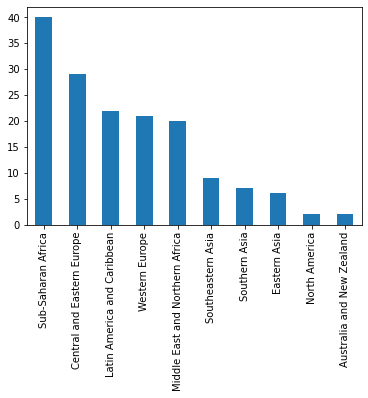

In [159]:
df.Region.value_counts().plot(kind='bar')

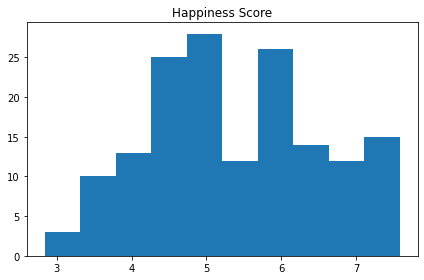

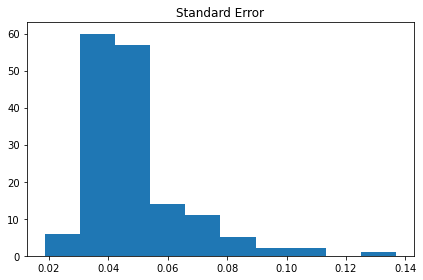

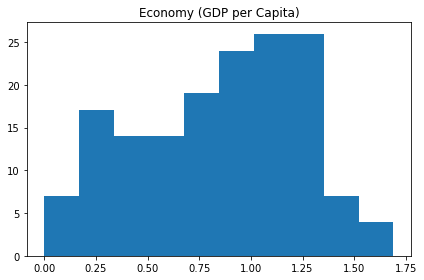

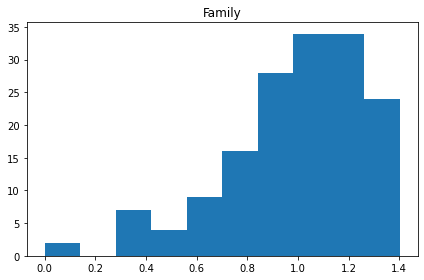

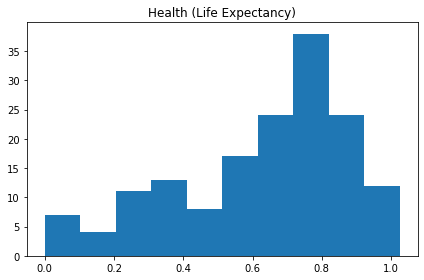

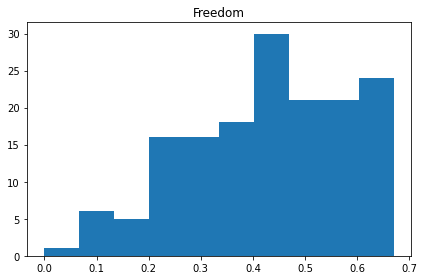

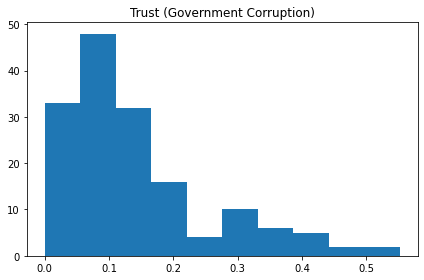

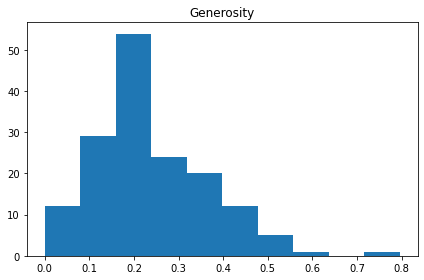

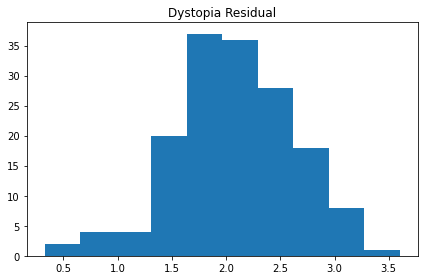

In [160]:
for i in df.columns[3:]:
    plt.hist(df[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

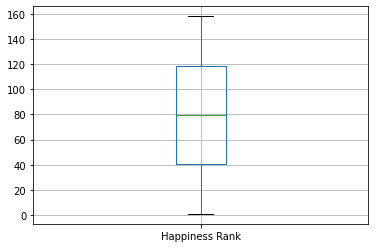

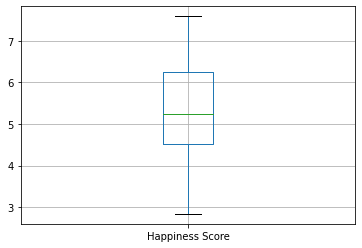

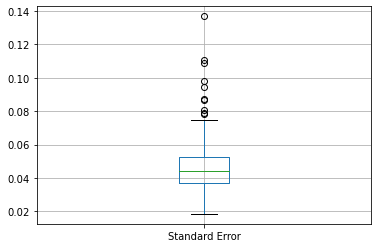

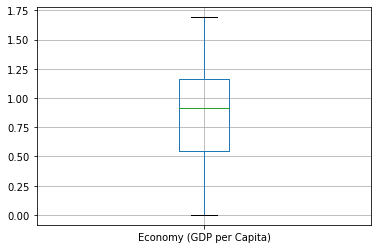

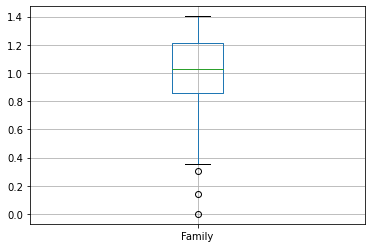

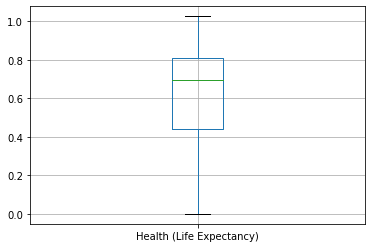

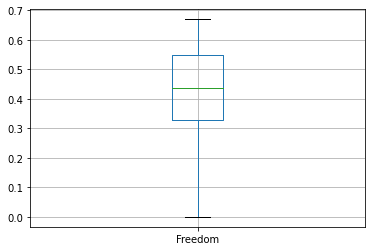

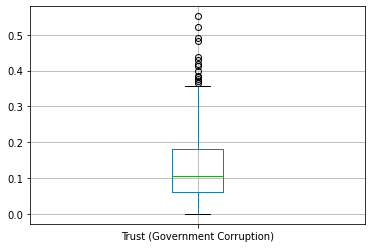

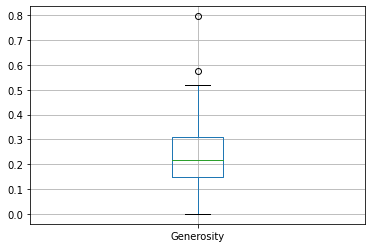

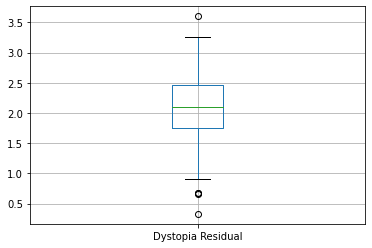

In [161]:
### Box Plots:
for i in df.columns[2:]:
        df.boxplot(column = i)
        plt.show()

In [162]:
###Finding correlations
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

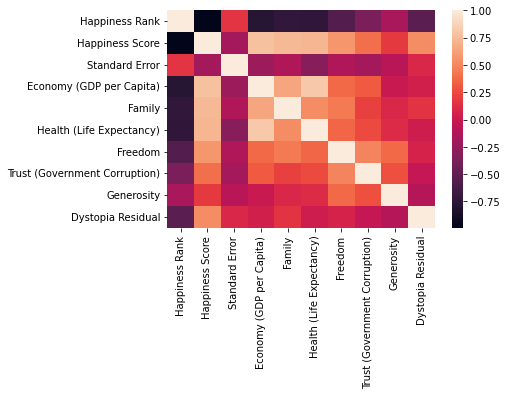

In [163]:
sns.heatmap(df.corr())

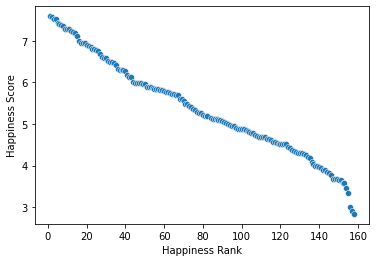

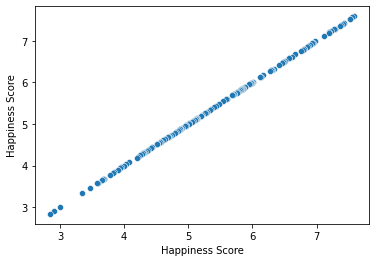

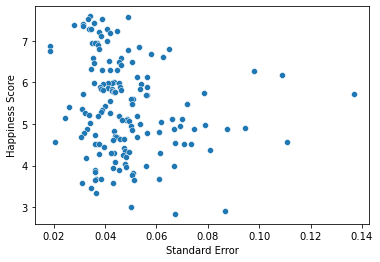

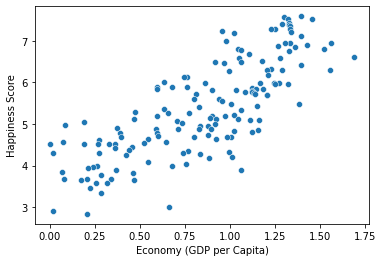

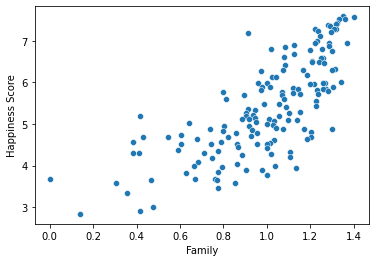

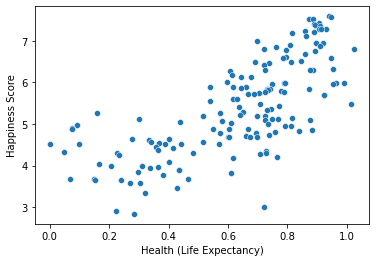

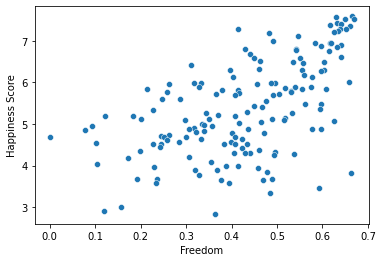

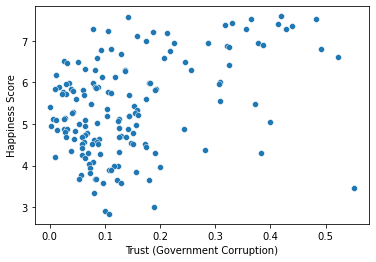

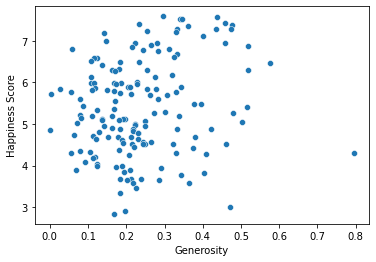

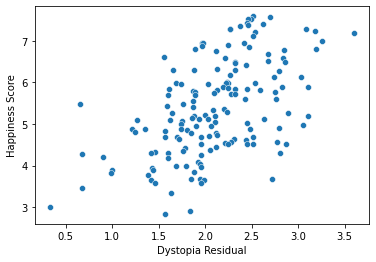

In [164]:
###Correlations of each feature with "Happiness Score". 
# In general, scatterplots are best for analyzing two continuous variables. Suitable in our case

for i in df.columns[2:]:
    plt.figure()
    sns.scatterplot( x = df[i], y= "Happiness Score", data= df)

In [166]:
regions = df.Region.unique()

In [168]:
Regions_Scores = df.groupby(by= "Region")['Happiness Score'].mean()
Regions_Scores

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

<AxesSubplot:xlabel='Region'>

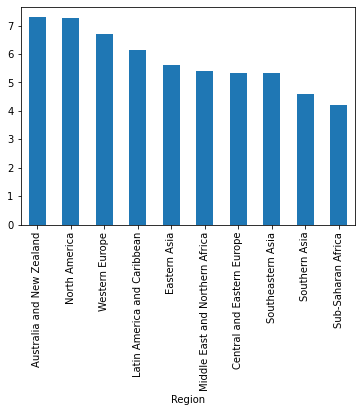

In [169]:
Regions_Scores.sort_values( ascending = False).plot.bar()

In [170]:
df.sort_values("Region").groupby(by= "Region").head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
63,Russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394
61,Croatia,Central and Eastern Europe,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
64,Jamaica,Latin America and Caribbean,65,5.709,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001


In [171]:
# Sorting by both: Region and Happiness Score
df.sort_values(["Region","Happiness Score"], ascending = [True, False]).groupby(by= "Region").head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
30,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
44,Slovakia,Central and Eastern Europe,45,5.995,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214


In [172]:
# Another way of getting top 3 of each region by filtering through the df
df_3 = df.head(3)
for i in range(1,len(regions)):
    region = df[df["Region"]== regions[i]].head(3)
    df_3 = df_3.append(region)

In [173]:
df_3

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
21,Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489


In [174]:
df_top3 = df.sort_values(["Region","Happiness Score"], ascending = [True, False]).groupby(by= "Region").head(3)

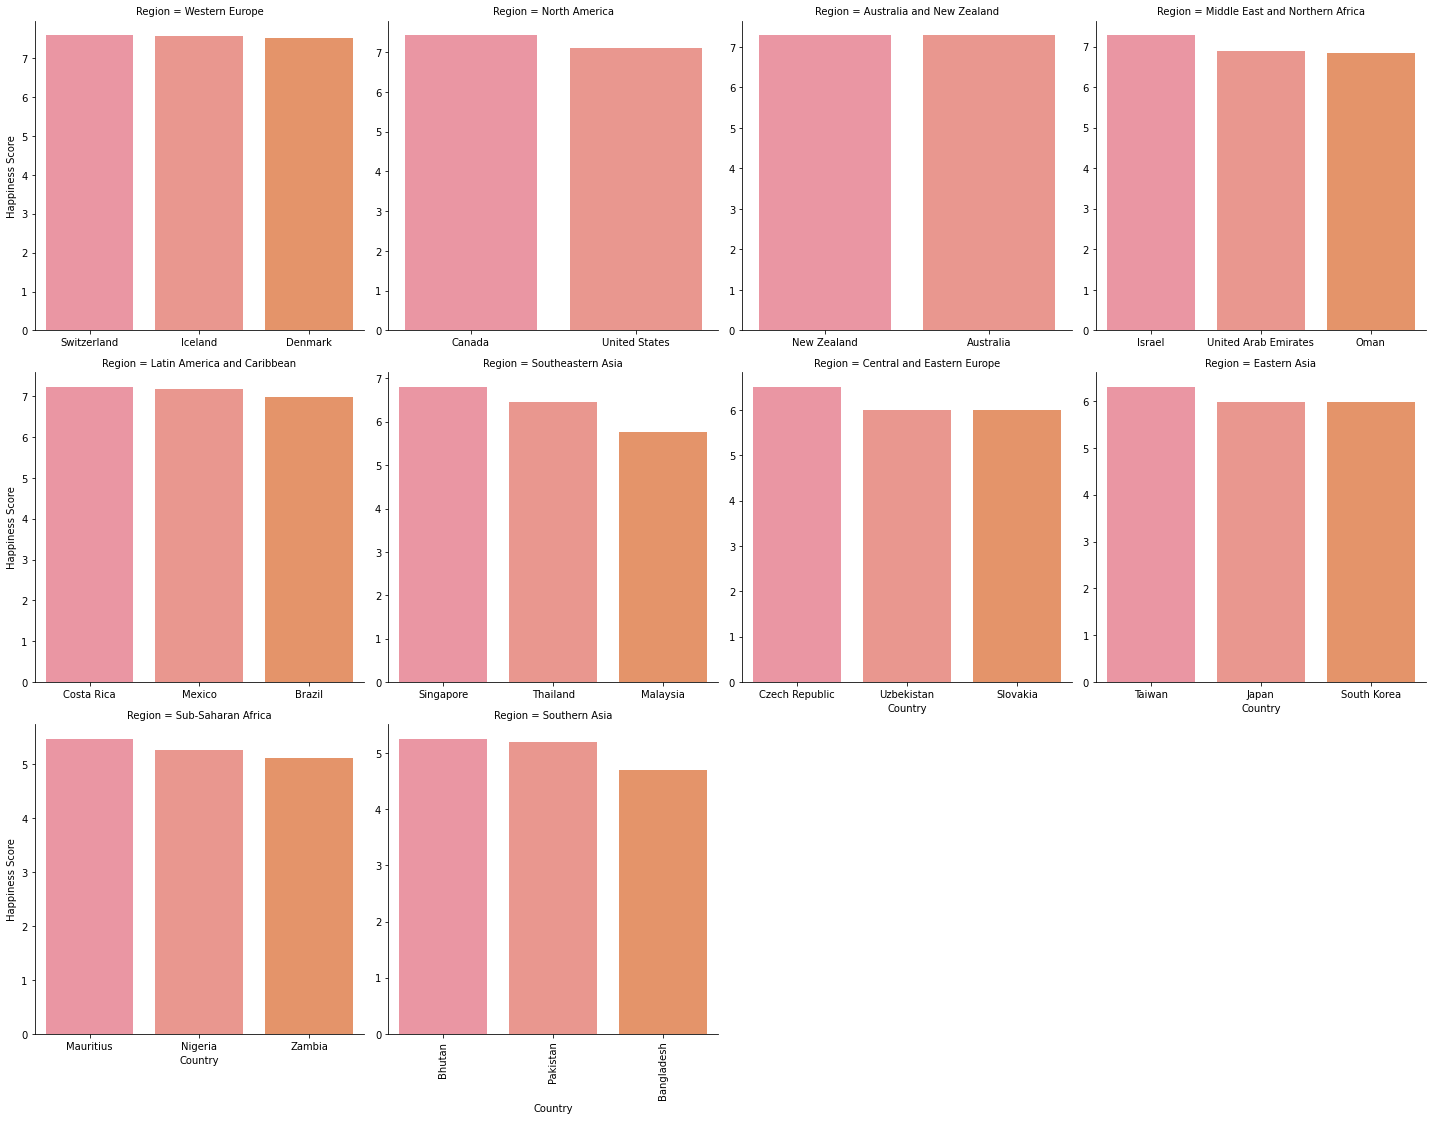

In [175]:
sns.catplot( x = "Country", y =  "Happiness Score", col = "Region", data = df_3 , kind ="bar", col_wrap = 4, sharex= False, sharey = False)
plt.xticks(rotation= 90)
plt.legend('',frameon=False)

In [176]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Economy (GDP per Capita)¶

In [177]:
df.nlargest(3, 'Economy (GDP per Capita)').iloc[:,[0,1,5,3]]

,Country,Region,Economy (GDP per Capita),Happiness Score
27,Qatar,Middle East and Northern Africa,1.69042,6.611
16,Luxembourg,Western Europe,1.56391,6.946
38,Kuwait,Middle East and Northern Africa,1.55422,6.295


In [178]:
df.nsmallest(3, 'Economy (GDP per Capita)').iloc[:,[0,1,5,3]]

,Country,Region,Economy (GDP per Capita),Happiness Score
119,Congo (Kinshasa),Sub-Saharan Africa,0.00000,4.517
156,Burundi,Sub-Saharan Africa,0.01530,2.905
130,Malawi,Sub-Saharan Africa,0.01604,4.292


## family

In [179]:


df.nlargest(3, 'Family').iloc[:,[0,1,6,3]]

,Country,Region,Family,Happiness Score
1,Iceland,Western Europe,1.40223,7.561
17,Ireland,Western Europe,1.36948,6.940
2,Denmark,Western Europe,1.36058,7.527


In [180]:
df.nsmallest(3, 'Family').iloc[:,[0,1,6,3]]

,Country,Region,Family,Happiness Score
147,Central African Republic,Sub-Saharan Africa,0.00000,3.678
157,Togo,Sub-Saharan Africa,0.13995,2.839
152,Afghanistan,Southern Asia,0.30285,3.575


## Health (Life Expectancy)¶

In [181]:
df.nlargest(3, 'Health (Life Expectancy)').iloc[:,[0,1,7,3]]



,Country,Region,Health (Life Expectancy),Happiness Score
23,Singapore,Southeastern Asia,1.02525,6.798
71,Hong Kong,Eastern Asia,1.01328,5.474
45,Japan,Eastern Asia,0.99111,5.987


In [182]:
df.nsmallest(3, 'Health (Life Expectancy)').iloc[:,[0,1,7,3]]

,Country,Region,Health (Life Expectancy),Happiness Score
122,Sierra Leone,Sub-Saharan Africa,0.00000,4.507
127,Botswana,Sub-Saharan Africa,0.04776,4.332
147,Central African Republic,Sub-Saharan Africa,0.06699,3.678


## Freedom

In [183]:
df.nlargest(3, 'Freedom').iloc[:,[0,1,8,3]]

,Country,Region,Freedom,Happiness Score
3,Norway,Western Europe,0.66973,7.522
0,Switzerland,Western Europe,0.66557,7.587
144,Cambodia,Southeastern Asia,0.66246,3.819


In [184]:
df.nsmallest(3, 'Freedom').iloc[:,[0,1,8,3]]

,Country,Region,Freedom,Happiness Score
111,Iraq,Middle East and Northern Africa,0.00000,4.677
101,Greece,Western Europe,0.07699,4.857
95,Bosnia and Herzegovina,Central and Eastern Europe,0.09245,4.949


## Trust (Government Corruption)


In [187]:
df.nlargest(3, 'Trust (Government Corruption)').iloc[:,[0,1,9,3]]

,Country,Region,Trust (Government Corruption),Happiness Score
153,Rwanda,Sub-Saharan Africa,0.55191,3.465
27,Qatar,Middle East and Northern Africa,0.52208,6.611
23,Singapore,Southeastern Asia,0.49210,6.798


In [188]:
df.nsmallest(10, 'Trust (Government Corruption)').iloc[:,[0,1,9,3]]

,Country,Region,Trust (Government Corruption),Happiness Score
73,Indonesia,Southeastern Asia,0.00000,5.399
95,Bosnia and Herzegovina,Central and Eastern Europe,0.00227,4.949
85,Romania,Central and Eastern Europe,0.00649,5.124
133,Bulgaria,Central and Eastern Europe,0.00872,4.218
55,Lithuania,Central and Eastern Europe,0.01031,5.833
87,Portugal,Western Europe,0.01078,5.102
40,Trinidad and Tobago,Latin America and Caribbean,0.01140,6.168
101,Greece,Western Europe,0.01397,4.857
51,Moldova,Central and Eastern Europe,0.01615,5.889
64,Jamaica,Latin America and Caribbean,0.02299,5.709


## Generosity

In [189]:
df.nlargest(3, 'Generosity').iloc[:,[0,1,10,3]]

,Country,Region,Generosity,Happiness Score
128,Myanmar,Southeastern Asia,0.79588,4.307
33,Thailand,Southeastern Asia,0.57630,6.455
20,United Kingdom,Western Europe,0.51912,6.867


In [190]:
df.nsmallest(10, 'Generosity').iloc[:,[0,1,10,3]]

,Country,Region,Generosity,Happiness Score
101,Greece,Western Europe,0.00000,4.857
63,Russia,Central and Eastern Europe,0.00199,5.716
55,Lithuania,Central and Eastern Europe,0.02641,5.833
61,Croatia,Central and Eastern Europe,0.05444,5.759
129,Georgia,Central and Eastern Europe,0.05547,4.297
22,Venezuela,Latin America and Caribbean,0.05841,6.810
106,Tunisia,Middle East and Northern Africa,0.06431,4.739
142,Gabon,Sub-Saharan Africa,0.06822,3.896
91,Morocco,Middle East and Northern Africa,0.07172,5.013
79,Azerbaijan,Central and Eastern Europe,0.07799,5.212


###### Findings from analysing the explanatory factors  
1- Trust (Government Corruption):

Rwanda is an extreme outlier with 0.55191 corresponding to to a happiness index of merely 3.465. On the other hand, countries like Trinidad and Tobago and Moldova surprisingly scored low

2- Generosity:

The people of Myanmar believe the are quite generous (0.79588, way bigger than secondly Thailand) despite their happinesses indicator of less than 5. Venezuela's happiness index is 6.810 when generousity is quite low

3- Freedom:

Cambodia has a high freedom result of 0.66246 relative to a low score of 3.819. Similarly, we observe Rwandan are largely satisfied with freedom 0.59201 despite low happiness overall (3.465)